# Vancouver Crime Predictor

## Intro

This project is to see if we can predict the type of crime in Vancouver, BC, Canada based of the following data points:
- Year
- Month
- Day
- Hour
- Hundred Block
- Neighbourhood
- X cord
- Y cord

## NULL hypothesis 
- The above fields have no correlation to the type of crime

## Hypothesis 
- One or more of the fields have a correlation 

## Dataset
We are taking the 

## Data Exploration
lets see what we can get from an initial exploration of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load our data
df = pd.read_csv('./crimedata_csv_AllNeighbourhoods_AllYears.csv')

In [3]:
df.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
5,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
6,Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
7,Break and Enter Commercial,2022,1,5,7,34,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
8,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.3857,5.459161e+06
9,Break and Enter Commercial,2006,5,21,4,50,10XX ALBERNI ST,West End,491021.3857,5.459161e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895614 entries, 0 to 895613
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           895614 non-null  object 
 1   YEAR           895614 non-null  int64  
 2   MONTH          895614 non-null  int64  
 3   DAY            895614 non-null  int64  
 4   HOUR           895614 non-null  int64  
 5   MINUTE         895614 non-null  int64  
 6   HUNDRED_BLOCK  895602 non-null  object 
 7   NEIGHBOURHOOD  895466 non-null  object 
 8   X              895538 non-null  float64
 9   Y              895538 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 68.3+ MB


In [5]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,895614.000000,895614.000000,895614.000000,895614.000000,895614.000000,895538.000000,8.955380e+05
mean,2012.465785,6.498994,15.386441,12.301045,15.897696,448722.045469,4.974653e+06
std,6.309667,3.413187,8.758797,7.466049,18.372942,139724.845646,1.548779e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2007.000000,4.000000,8.000000,7.000000,0.000000,490188.474100,5.454204e+06
50%,2012.000000,7.000000,15.000000,14.000000,5.000000,491572.112500,5.457169e+06
75%,2018.000000,9.000000,23.000000,18.000000,30.000000,493378.640800,5.458718e+06
max,2024.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


### Lets explore our data and see if we can find any correlations before training

In [6]:
print(len(df))
total_records = len(df)
print(df.count())

print('missing {} from hundred_block'.format(total_records - df['HUNDRED_BLOCK'].count()))
print('missing {} from hundred_block'.format(total_records - df['NEIGHBOURHOOD'].count()))
print('missing {} from hundred_block'.format(total_records - df['X'].count()))
print('missing {} from hundred_block'.format(total_records - df['Y'].count()))

895614
TYPE             895614
YEAR             895614
MONTH            895614
DAY              895614
HOUR             895614
MINUTE           895614
HUNDRED_BLOCK    895602
NEIGHBOURHOOD    895466
X                895538
Y                895538
dtype: int64
missing 12 from hundred_block
missing 148 from hundred_block
missing 76 from hundred_block
missing 76 from hundred_block


## We have a very small sample of missing data, dropping it should have zero impact 

In [7]:
df = df.dropna()
df.count()

TYPE             895454
YEAR             895454
MONTH            895454
DAY              895454
HOUR             895454
MINUTE           895454
HUNDRED_BLOCK    895454
NEIGHBOURHOOD    895454
X                895454
Y                895454
dtype: int64

# Let's graph crimes by year

       TYPE  MONTH    DAY   HOUR  MINUTE  HUNDRED_BLOCK  NEIGHBOURHOOD      X  \
YEAR                                                                            
2003  58786  58786  58786  58786   58786          58786          58786  58786   
2004  58076  58076  58076  58076   58076          58076          58076  58076   
2005  53395  53395  53395  53395   53395          53395          53395  53395   
2006  49620  49620  49620  49620   49620          49620          49620  49620   
2007  44374  44374  44374  44374   44374          44374          44374  44374   
2008  41694  41694  41694  41694   41694          41694          41694  41694   
2009  37967  37967  37967  37967   37967          37967          37967  37967   
2010  35631  35631  35631  35631   35631          35631          35631  35631   
2011  34404  34404  34404  34404   34404          34404          34404  34404   
2012  35491  35491  35491  35491   35491          35491          35491  35491   
2013  35777  35777  35777  3

/home/gil/miniconda3/envs/van-crime/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x500 with 0 Axes>

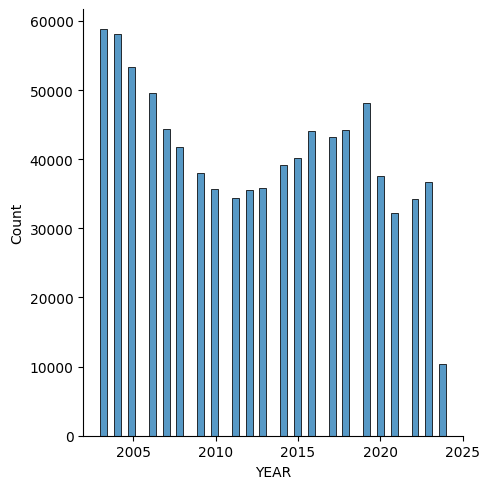

In [8]:
plt.figure(figsize=(20,5))
crimes_by_year = df.groupby('YEAR').count()
print(crimes_by_year)
sns.displot(df, x='YEAR', bins=50)

## Now lets see the number of crimes by neighbourhood

                             TYPE    YEAR   MONTH     DAY    HOUR  MINUTE  \
NEIGHBOURHOOD                                                               
Arbutus Ridge                9517    9517    9517    9517    9517    9517   
Central Business District  242667  242667  242667  242667  242667  242667   
Dunbar-Southlands           11625   11625   11625   11625   11625   11625   
Fairview                    54572   54572   54572   54572   54572   54572   
Grandview-Woodland          50061   50061   50061   50061   50061   50061   
Hastings-Sunrise            30751   30751   30751   30751   30751   30751   
Kensington-Cedar Cottage    42401   42401   42401   42401   42401   42401   
Kerrisdale                  11666   11666   11666   11666   11666   11666   
Killarney                   16836   16836   16836   16836   16836   16836   
Kitsilano                   43419   43419   43419   43419   43419   43419   
Marpole                     22488   22488   22488   22488   22488   22488   

<Axes: xlabel='NEIGHBOURHOOD', ylabel='count'>

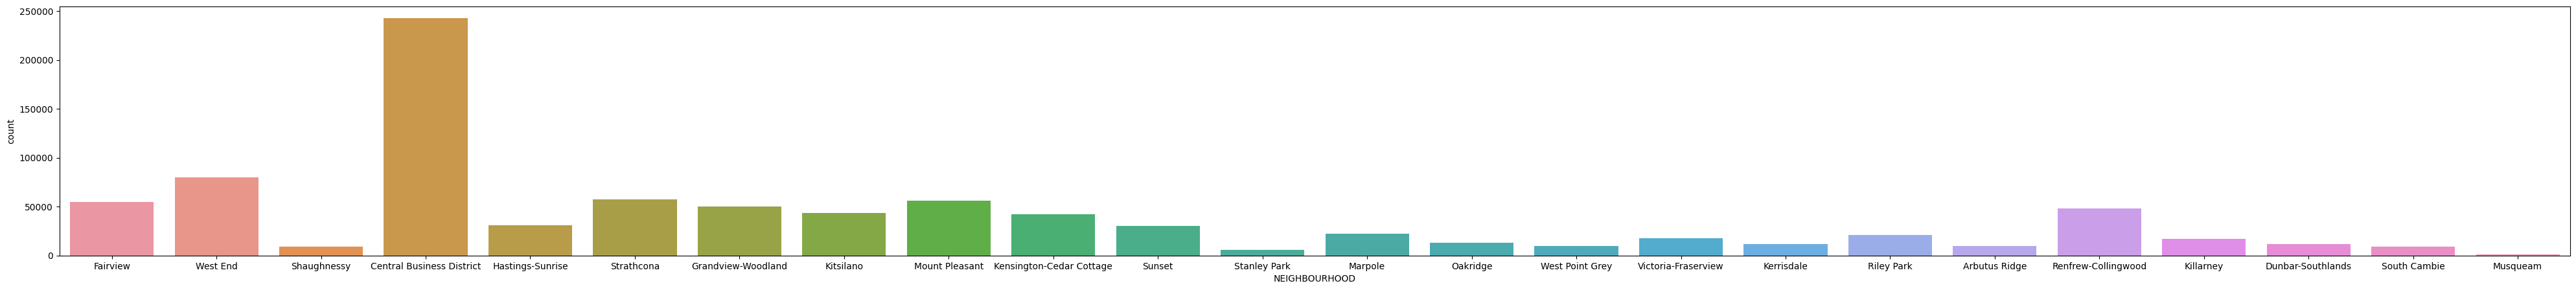

In [9]:
neigh_count = df.groupby('NEIGHBOURHOOD').count()
print(neigh_count)
fig = plt.figure(figsize=(50,5))
sns.countplot(df, x='NEIGHBOURHOOD')


## Central Business District 
This area seems to account for a large proportion of the crimes being committed. While Musqueam has a very low number of crimes compared to the others. Let's explore these two phenomen further. 

### lets see what types of crimes are being committed.

                                                     YEAR  MONTH    DAY  \
TYPE                                                                      
Break and Enter Commercial                          13666  13666  13666   
Break and Enter Residential/Other                    4375   4375   4375   
Homicide                                               78     78     78   
Mischief                                            30656  30656  30656   
Offence Against a Person                            23725  23725  23725   
Other Theft                                         78583  78583  78583   
Theft from Vehicle                                  72338  72338  72338   
Theft of Bicycle                                     9895   9895   9895   
Theft of Vehicle                                     4830   4830   4830   
Vehicle Collision or Pedestrian Struck (with Fa...     56     56     56   
Vehicle Collision or Pedestrian Struck (with In...   4465   4465   4465   

                        

<Axes: xlabel='TYPE', ylabel='count'>

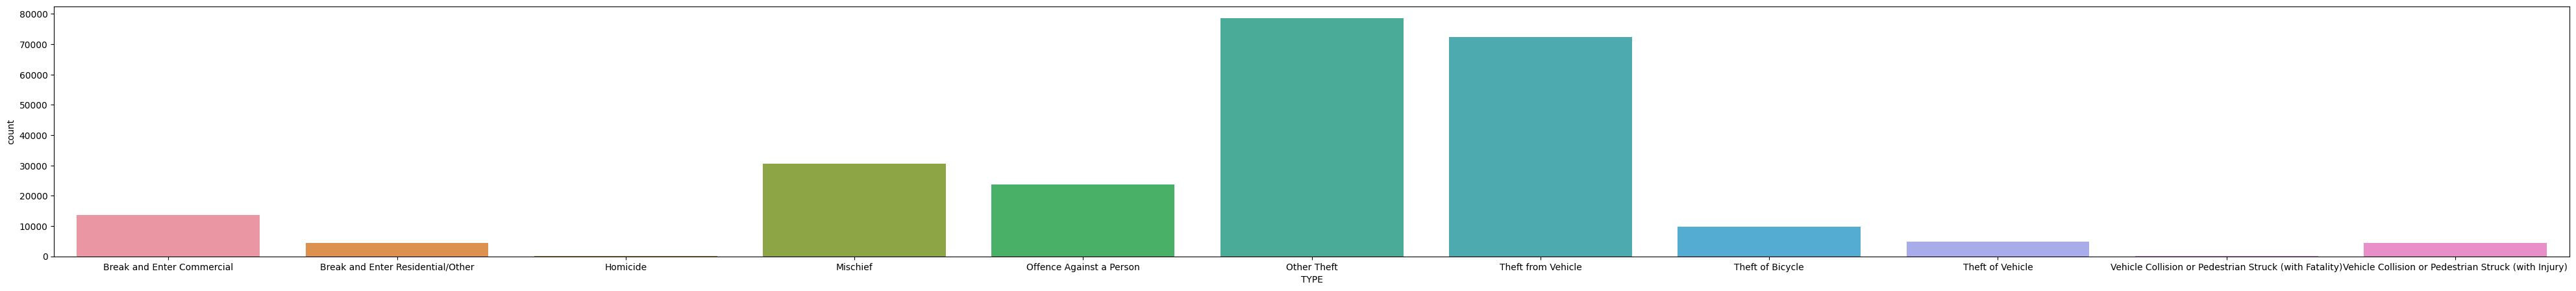

In [10]:
cbd = df[df['NEIGHBOURHOOD'] == 'Central Business District']
print(cbd.groupby('TYPE').count())
fig = plt.figure(figsize=(50,5))
sns.countplot(cbd, x='TYPE')



In [11]:
count = cbd.groupby('HUNDRED_BLOCK').count().idxmax()
print(pd.options.display.max_rows)

# Looks like we have some bad data here, we don't know where the crime occurred in these cases and its the biggest block
# we will want to keep this data, 
print("length of frame: {}".format(len(df[df['HUNDRED_BLOCK'] == 'OFFSET TO PROTECT PRIVACY' ])))
print(df['HUNDRED_BLOCK'].value_counts().head(100))


60
length of frame: 79081
HUNDRED_BLOCK
OFFSET TO PROTECT PRIVACY    79081
7XX GRANVILLE ST              7667
X NK_LOC ST                   6374
31XX GRANDVIEW HWY            5928
7XX W GEORGIA ST              5640
                             ...  
12XX RICHARDS ST               840
10XX HOMER ST                  839
1XX W BROADWAY AVE             822
6XX W CORDOVA ST               822
9XX ROBSON ST                  821
Name: count, Length: 100, dtype: int64


## OFFSET TO PROTECT PRIVACY
This column is the only one that will have impact, lets drop them for now as we still will have a lot of data we can revist later.

## Update

We should not drop this column and just leave it as is, we will have null results in our target classes otherwise.

In [12]:
# df['HUNDRED_BLOCK'].replace('OFFSET TO PROTECT PRIVACY', np.nan, inplace=True)
# print("total records before dropping na {}".format(len(df)))
# df.dropna(inplace=True)
# print("total records after dropping na {}".format(len(df)))

# Lets take at the numeric data types for correlation

In [13]:
sns.pairplot(df)

SyntaxError: invalid decimal literal (3447561869.py, line 2)

In [ ]:
corr = df[['YEAR','MONTH', 'DAY', 'HOUR', 'X', 'Y']].corr()

<Axes: >

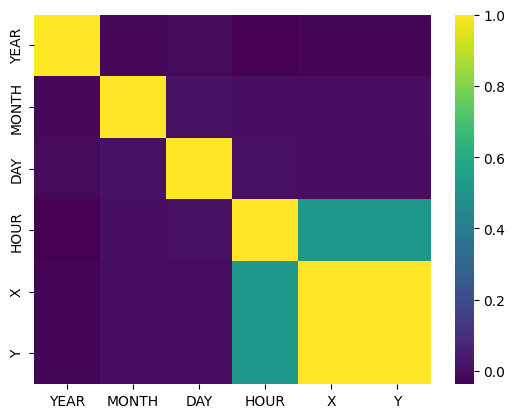

In [ ]:
sns.heatmap(corr, cmap='viridis')

## From what we can see there is not a high level of correlation between any of the columns
## Lets create some dummies for our string categories
first we should add a row for street that removes the address number and XX from the hundred block to reduce our number of columns

## Interesting Find
There does seem to be a small correlation between HOUR and X Y cordinates, this may be something fun to explore in the future.
For now lets continue on with our original hypothesis. 

In [14]:
df['STREET'] = df['HUNDRED_BLOCK'].replace(to_replace=r'(\d+)(XX)', value='', regex=True)

In [15]:
counts = df.groupby('STREET').count()
less = counts[counts['TYPE'] < 3].index
less

for street in less:
    df['STREET'].replace(to_replace=street, value=np.nan, inplace=True)

df['STREET'].value_counts()


/tmp/ipykernel_31557/419211907.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STREET'].replace(to_replace=street, value=np.nan, inplace=True)


STREET
OFFSET TO PROTECT PRIVACY     79081
 GRANVILLE ST                 30270
 ROBSON ST                    17418
 W GEORGIA ST                 16267
 E HASTINGS ST                15339
                              ...  
6X WORTHINGTON PL                 3
E 39TH AVE / SHERBROOKE ST        3
OAK ST / LAURIER AVE              3
W 40TH AVE / WEST BLVD            3
X E 45TH AVE                      3
Name: count, Length: 6456, dtype: int64

In [18]:
len(df)
df = df.dropna()
len(df)

df = df.sample(n=20000, random_state=101)


In [19]:
street_dummies = pd.get_dummies(df['STREET'], drop_first=True)
neighbourhood_dummies = pd.get_dummies(df['NEIGHBOURHOOD'], drop_first=True)
neighbourhood_dummies.info()
df = pd.concat([df.drop(['NEIGHBOURHOOD','HUNDRED_BLOCK', 'STREET'], axis=1), neighbourhood_dummies, street_dummies], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 127463 to 601879
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Central Business District  20000 non-null  bool 
 1   Dunbar-Southlands          20000 non-null  bool 
 2   Fairview                   20000 non-null  bool 
 3   Grandview-Woodland         20000 non-null  bool 
 4   Hastings-Sunrise           20000 non-null  bool 
 5   Kensington-Cedar Cottage   20000 non-null  bool 
 6   Kerrisdale                 20000 non-null  bool 
 7   Killarney                  20000 non-null  bool 
 8   Kitsilano                  20000 non-null  bool 
 9   Marpole                    20000 non-null  bool 
 10  Mount Pleasant             20000 non-null  bool 
 11  Musqueam                   20000 non-null  bool 
 12  Oakridge                   20000 non-null  bool 
 13  Renfrew-Collingwood        20000 non-null  bool 
 14  Riley Park           

# Train the model
Data is prepared, lets see if we can train the model    

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

crime_labels = pd.get_dummies(df['TYPE'])
x = df.drop(['TYPE'], axis=1)
y = crime_labels
num_classes = y.nunique()



In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=.1)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


        YEAR  MONTH  DAY  HOUR  MINUTE            X             Y  \
666581  2019      4   27     0       0  484914.0156  5.456905e+06   

        Central Business District  Dunbar-Southlands  Fairview  ...  \
666581                      False              False     False  ...   

        X W 4TH AVE  X W 5TH AVE  X W 7TH AVE  X W 8TH AVE  X W CORDOVA ST  \
666581        False        False        False        False           False   

        X W HASTINGS ST  X WATER ST  YUKON ST / W 12TH AVE  \
666581            False       False                  False   

        YUKON ST / W BROADWAY AVE  YUKON ST / W KING EDWARD AVE  
666581                      False                         False  

[1 rows x 2093 columns]


In [26]:
model = Sequential()

model.add(Dense(units=2094, activation='relu'))

model.add(Dense(units=11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Add early stopping

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Fit the model

In [87]:

model.fit(x=x_train, y=y_train, epochs=25, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])


Epoch 1/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7307 - loss: 0.7417 - val_accuracy: 0.4465 - val_loss: 1.8667
Epoch 2/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7450 - loss: 0.7043 - val_accuracy: 0.4495 - val_loss: 1.9130
Epoch 3/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7551 - loss: 0.6798 - val_accuracy: 0.4395 - val_loss: 2.0072
Epoch 4/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7682 - loss: 0.6370 - val_accuracy: 0.4550 - val_loss: 2.0565
Epoch 5/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7821 - loss: 0.5992 - val_accuracy: 0.4420 - val_loss: 2.1132
Epoch 6/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7866 - loss: 0.5824 - val_accuracy: 0.4430 - val_loss: 2.1998
Epoch 7/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7925 - loss: 0.5630 - val_accuracy: 0.4420 - val_loss: 2.2511
Epoch 8/25
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8062 - loss: 0.5331 - val_accuracy: 0.

<Axes: >

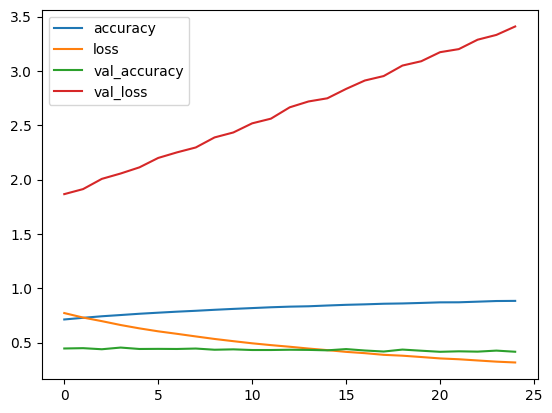

In [88]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [89]:
predict_y = model.predict(x_test) 
pred =np.argmax(predict_y,axis=1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


In [90]:
# Specify the list of classes based on unique values in y_test and pred
from tensorflow.keras.utils import to_categorical

# Convert the argmax result to one-hot encoded format
pred_one_hot = to_categorical(np.argmax(predict_y, axis=1), num_classes=11)

# Confusion Matrix
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_one_hot, axis=1))



array([[ 19,   9,   0,  18,   0,  39,  41,   6,   3,   0],
       [ 10,  30,   0,  16,   0,  22,  49,   7,   9,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [ 13,  20,   0,  44,   0,  56,  94,  14,  10,   3],
       [  0,   0,   0,   0, 190,   0,   0,   0,   0,   0],
       [ 14,  28,   0,  39,   0, 265,  96,  18,   5,   2],
       [ 28,  45,   0,  74,   0, 131, 254,  18,  22,   2],
       [  1,   7,   0,   4,   0,  36,  18,   4,   3,   1],
       [  3,  15,   0,   9,   0,  20,  33,   3,   5,   0],
       [  0,   7,   0,  10,   0,  17,   9,   4,   4,  22]])

## 10 Epochs
array([[  654,   212,     0,   672,     0,  1013,  2367,     0,     0,
            0,     4],
       [  180,   994,     0,   359,     0,  2106,  3740,     1,     0,
            0,    12],
       [    0,     0,     0,     0,    33,     0,     0,     0,     0,
            0,     0],
       [  469,   390,     0,  1320,     0,  3335,  5466,     3,     0,
            0,     5],
       [    0,     0,     0,     0,  7844,     0,     0,     0,     0,
            0,     0],
       [  255,   581,     0,   814,     0, 12569,  8245,     3,     0,
            0,     7],
       [  335,   626,     0,   826,     0,  4776, 18002,     2,     0,
            0,     5],
       [   47,    85,     0,    72,     0,  1217,  2351,     7,     0,
            0,     1],
       [   60,   251,     0,   178,     0,   735,  3359,     0,     0,
            0,     0],
       [    3,     4,     0,     4,     0,    14,     7,     0,     0,
            0,     0],
       [   78,   290,     0,   225,     0,  1796,   522,     0,     0,
            0,    15]])


## 10 Epochs
array([[    0,   622,  3273,  7668,     0,     0,     0,   672],
       [    0,   516,  3648,  6338,     0,     0,     0,   407],
       [    0,   639,  9592, 11858,     0,     0,     0,   524],
       [    0,   571,  5804, 17729,     0,     0,     0,   400],
       [    0,    84,  1091,  2578,     0,     0,     0,    34],
       [    0,   157,   736,  3584,     0,     0,     0,   166],
       [    0,     3,    15,    21,     0,     0,     0,     6],
       [    0,   159,  1176,  1263,     0,     0,     0,   304]])

## 

In [112]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred_one_hot, axis=1)))
labels = [
    'Break and Enter Commercial', 
    'Break and Enter Residential/Other',
    'Homicide', 
    'Mischief', 
    'Offence Against a Person', 
    'Other Theft',
    'Theft from Vehicle',
    'Theft of Bicycle', 
    'Theft of Vehicle',
    'Vehicle Collision or Pedestrian Struck (with Fatality)',
    'Vehicle Collision or Pedestrian Struck (with Injury)'
]

              precision    recall  f1-score   support

           0       0.22      0.14      0.17       135
           1       0.19      0.21      0.20       143
           2       0.00      0.00      0.00         2
           3       0.21      0.17      0.19       254
           4       0.99      1.00      0.99       190
           5       0.45      0.57      0.50       467
           6       0.43      0.44      0.43       574
           7       0.05      0.05      0.05        74
           8       0.08      0.06      0.07        88
          10       0.73      0.30      0.43        73

    accuracy                           0.42      2000
   macro avg       0.33      0.29      0.30      2000
weighted avg       0.41      0.42      0.41      2000



/home/gil/miniconda3/envs/van-crime/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gil/miniconda3/envs/van-crime/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gil/miniconda3/envs/van-crime/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [114]:

## Prediction for row 371257
pred_crime = model.predict(x_test[4].reshape(1, -1))  # Reshape the input sample and apply the scaler
pred = np.argmax(pred_crime, axis=1)
print(labels[pred[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Other Theft


# Labels
    0   => 'Break and Enter Commercial', 
    1   => 'Break and Enter Residential/Other',
    2   => 'Homicide', 
    3   => 'Mischief', 
    4   => 'Offence Against a Person', 
    5   => 'Other Theft',
    6   => 'Theft from Vehicle',
    7   => 'Theft of Bicycle', 
    8   => 'Theft of Vehicle',
    9   => 'Vehicle Collision or Pedestrian Struck (with Fatality)',
    10  => 'Vehicle Collision or Pedestrian Struck (with Injury)'

Looks like we got one right, but that is likely an outlier

In [111]:
## Prediction for row 127463
pred_crime = model.predict(x_test[0].reshape(1, -1))  # Reshape the input sample and apply the scaler
pred = np.argmax(pred_crime, axis=1)
print(labels[pred[0]])
# break and enter residential

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Break and Enter Residential/Other


In [106]:
y.loc[127463]

Break and Enter Commercial                                False
Break and Enter Residential/Other                         False
Homicide                                                  False
Mischief                                                   True
Offence Against a Person                                  False
Other Theft                                               False
Theft from Vehicle                                        False
Theft of Bicycle                                          False
Theft of Vehicle                                          False
Vehicle Collision or Pedestrian Struck (with Fatality)    False
Vehicle Collision or Pedestrian Struck (with Injury)      False
Name: 127463, dtype: bool

# This one is incorrect (expected)
Our F1 score was only .41 which is not the greatest, we can't expect to get great predictions from this model. 

# Conclusion

Based on the metrics in the confusion matrix and classication report, we don't enough correlating data to predict a viable output. 
The prediction accuracy never gets above a wighted f1 score of .4 making its predictions unstatisfactory. 
We would need to request additional data to
